In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
#Сначала определим с чем имеем дело

In [32]:
df = pd.read_excel('d:\set.xlsx', header=0)
df.columns

Index(['Персона', 'Возраст, лет', 'Стаж вождения, лет', 'Убыточность, %',
       'Уровень заработной платы, руб/год'],
      dtype='object')

In [33]:
#Сразу можно отметить, что графа "Персона" нам не особо интересна.

<AxesSubplot:xlabel='Возраст, лет', ylabel='Убыточность, %'>

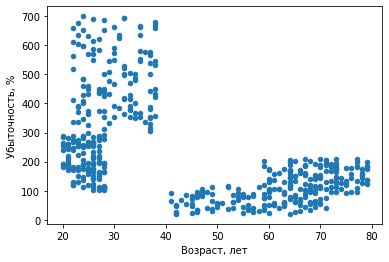

In [34]:
# Визуализация пар столбцов.
df.plot.scatter(x='Возраст, лет', y='Убыточность, %')

In [35]:
#Визуально определятся три кластера

<AxesSubplot:xlabel='Стаж вождения, лет', ylabel='Убыточность, %'>

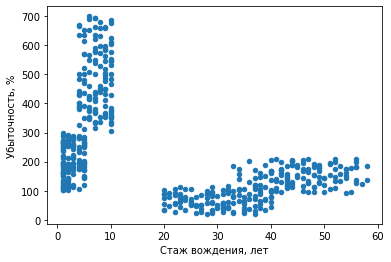

In [36]:
# Визуализация пар столбцов.
df.plot.scatter(x='Стаж вождения, лет', y='Убыточность, %')

<AxesSubplot:xlabel='Уровень заработной платы, руб/год', ylabel='Убыточность, %'>

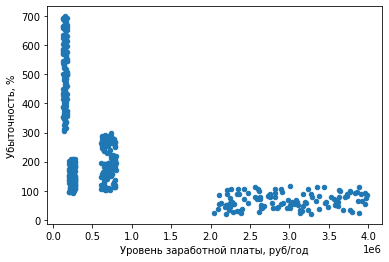

In [37]:
# Визуализация пар столбцов.
df.plot.scatter(x='Уровень заработной платы, руб/год', y='Убыточность, %')

In [38]:
# Как видно по последнему графику, кластеров, ВЕРОЯТНО, четыре.
# Т.е. по итогам двух предыдущих и последнего графика, можно сделать вывод, что возрастная группа
# от 20 до 40 лет имеет градацию на ТРИ подкластера, группирующихся по корреляции 
# среднегодового заработка и страховой убыточности.
# Oсобняком стоят люди в возрасте после 40 лет. Их убыточность является самой низкой в группе.

In [39]:
df_1 = df.drop(['Персона'], axis=1)

In [40]:
df_1.head()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,20,1,263,716693
1,74,51,107,274393
2,27,1,165,723841
3,24,6,348,139419
4,26,3,286,650003


In [41]:
from sklearn.preprocessing import StandardScaler
X = df_1
scaled = StandardScaler().fit_transform(X)

In [42]:
#стандартизуем данные

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(init = "k-means++", n_clusters = 4, n_init=12)

In [45]:
#обучим модель для 4 кластеров

In [46]:
kmeans.fit(X)

KMeans(n_clusters=4, n_init=12)

In [47]:
labels = kmeans.labels_

In [48]:
df["Маркер"] = labels

In [49]:
#Графа "Маркер" -  искомое данного задания

In [50]:
df.head()

,Персона,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",Маркер
0,6-LLJEH,20,1,263,716693,3
1,2-GLHFG,74,51,107,274393,1
2,6-FJFKL,27,1,165,723841,3
3,4-KJEJL,24,6,348,139419,1
4,5-JFFGH,26,3,286,650003,3


In [51]:
df_1["Маркер"] = labels

In [52]:
df_1.head()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",Маркер
0,20,1,263,716693,3
1,74,51,107,274393,1
2,27,1,165,723841,3
3,24,6,348,139419,1
4,26,3,286,650003,3


In [53]:
df_1.groupby("Маркер").mean()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
Маркер,,,,
0,56.712121,29.500000,64.787879,2.526266e+06
1,49.979339,26.574380,319.760331,1.962100e+05
2,56.945455,30.454545,66.909091,3.521700e+06
3,24.504132,2.586777,203.024793,7.004473e+05


In [54]:
#Исходя из последнего фрейма группировки людей по кластерам, можно сделать следующий вывод:
# 1) Наименьшим ущербом при страховании обладают люди с бО'льшим доходом
# 2) Второй по убыточности категорией являются молодые люди до 25 лет, с небольшим стажем вождения
# Вероятнее всего причиной их страховых случаев является НЕнамеренное попадание в аварии
# по неопытности/глупостти/"какой русский не любит быстрой езды"
# 3) Наибольшей убыточностью обладают люди, имеющий довольно большой стаж вождения, являющиеся
# людьми старше 45 лет и обладающие КРАЙНЕ НИЗКИМ ПОКАЗАТЕЛЕМ ЗАРАБОТНОЙ ПЛАТЫ.
# Иными словами между убыточностью страхoвого случая и ЗАРАБОТНОЙ ПЛАТОЙ есть прямая корреляция.

# Можно выделить следующий психопортрет: человек средне-старшего возраста, с низким доходом,
# знающий как использовать авто охоmнее создаст страховой случай с целью получения выплаты.


In [60]:
df_test = [24, 6, 348, 139419]
X_test = pd.DataFrame(df_test)
X_test = X_test.transpose()
scaled_test = StandardScaler().fit_transform(X_test)
predicted_label = kmeans.predict(scaled_test)